In [1]:
# Multi-processing and parallel computing

In [2]:
import multiprocessing as mp

In [3]:
print(f"Number of cpu: {mp.cpu_count()}")

Number of cpu: 4


In [4]:
import numpy as np
import time

In [39]:
# Function to generate random numbers with a fixed starting point
def rand_sq(inp_num):
    np.random.seed(inp_num)
    rand_num = np.random.randint(0,10)
    return rand_num**2

In [33]:
# Executing the sum and time in calculation
t0 = time.time()
total_sum = []
for i in range(10000000):
    total_sum.append((rand_sq(i)))
t1 = time.time()
print(f"Execution time {t1 - t0} sec")

Execution time 42.60209083557129 sec


In [34]:
# The simplest way to do parallel computing using the multiprocessing is to use the pool class. There
# are four common methods in this class that are used often: apply, map, apply_async, and map_async.

In [35]:
# map(func, iterable)
# Apply the function func to each element in the iterable and then collect the results.

In [37]:
# Multiprocessing using pool.map
t0 = time.time()
n_cpu = mp.cpu_count()

pool = mp.Pool(processes = n_cpu)
# map function requires the range variable as well, to staisfy the iterable condition
# map(func, iterable)
total = [pool.map(rand_sq, range(10000000))]
t1 = time.time()
print(f"Execution time {t1 - t0} sec")

Execution time 14.640633583068848 sec


In [ ]:
# The pool.apply function is similar except that it can accept more arguments. The "pool.map" and
# "pool.apply" will lock the main program until all the processes are finished, which is quite useful if we
# want to obtain results in a particular order for some applications.

In [ ]:
# Plotting the executuion time vs number in the input of the process

Text(0.5, 0, 'The number upto which,the function is run')

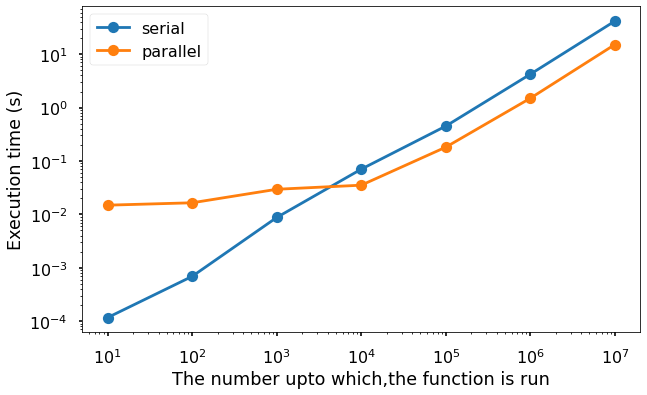

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-poster")
%matplotlib inline


def serial(n):
    t0 = time.time()
    tot_sum = []
    for i in range(n):
        tot_sum.append(rand_sq(i))
    t1 = time.time()
    exec_time = t1 - t0
    return exec_time

def parallel(n):
    t0 = time.time()         # initial time
    n_cpu = mp.cpu_count()     # Info of the number of cpu in pc
    
    pool = mp.Pool(processes = n_cpu)    # pooling the resource
# pool.map() , is iterable therefore, we don't have to run for loop like in serial case
    tot_sum = [pool.map(rand_sq, range(n))] # executing the resource 
    t1 = time.time()         # final time
    exec_time = t1-t0
    return exec_time

n_run = np.logspace(1,7, num =7)# dividing the axis space into parts

# running the number loop, upto which the function is implemented
time_serial = [serial(int(n)) for n in n_run]    
time_parallel = [parallel(int(n)) for n in n_run]
    
plt.figure(figsize = (10, 6))
plt.plot(n_run, time_serial, "-o", label = "serial")
plt.plot(n_run, time_parallel, "-o", label = "parallel")
plt.loglog()
plt.legend()
plt.ylabel("Execution time (s)")   
plt.xlabel("The number upto which,the function is run")

In [10]:
# Therefore, if the inmput number is less than 10000, the serial 
# calculation is faster, though after that the parallel becomes faster

In [26]:
# JobLib
from joblib import Parallel, delayed
import numpy as np
import time

In [27]:
def sq_num(inp_n):
    np.random.seed(inp_n)
    rand_num = np.random.randint(0,10)
    return rand_num**2

In [29]:
t0 = time.time()
tot_sum = Parallel(n_jobs = mp.cpu_count())\
    (delayed(sq_num)(i) for i in range(10000000)) 
t1 = time.time()
exec_time = t1 - t0
print(exec_time)

40.756178855895996


In [24]:
# The delayed function is used to capture the arguments of
# the target function, which in this case is the sq_num.

In [47]:
import numpy as np
import multiprocessing as mp
import time


def cube(m):
    n = list[m]
    for i in range(len(n)):
        for j in range(len(i)):
            s = n[j]
        return s**3
        
            
    
    

n_cpu = mp.cpu_count()
pool = mp.Pool(processes = n_cpu)

z = []
for i,j in zip(range(10), range(10)):
    z.append((i,j))


t0 = time.time()
tot_sum = [pool.map(cube, z)]

t1 = time.time()

TypeError: 'type' object is not subscriptable